# Uncertainty Traps

## Overview

In this lecture we study a simplified version of an uncertainty traps model of Fajgelbaum, Schaal and Taschereau-Dumouchel [[FSTD15]](https://lectures.quantecon.org/jl/zreferences.html#fun)

The model features self-reinforcing uncertainty that has big impacts on economic activity

In the model,

- Fundamentals  vary stochastically and are not fully observable  
- At any moment there are both active and inactive entrepreneurs; only active entrepreneurs produce  
- Agents – active and inactive entrepreuneurs –  have beliefs about the fundamentals expressed as probability distributions  
- Greater uncertainty means greater dispersions of these distributions  
- Entrepreneurs are risk averse and hence less inclined to be active  when uncertainty is high  
- The output of active entrepreneurs is observable, supplying a noisy signal that helps everyone inside the model infer fundamentals  
- Entrepreneurs update their beliefs about fundamentals using Bayes’ Law, implemented via [Kalman filtering](https://lectures.quantecon.org/jl/kalman.html#)  


Uncertainty traps emerge because:

- High uncertainty discourages entrepreneurs from becoming active  
- A low level of participation – i.e., a smaller number of active entrepreneurs – diminishes the flow of information about fundamentals  
- Less information translates to higher uncertainty, further discouraging entrepreneurs from choosing to be active, and so on  


Uncertainty traps stem from a positive externality: high aggregate economic activity levels generates valuable information

## The Model

The original model described in [[FSTD15]](https://lectures.quantecon.org/jl/zreferences.html#fun) has many interesting moving parts

Here we examine a simplified version that nonetheless captures many of the key ideas

### Fundamentals

The evolution of the fundamental process $ \{\theta_t\} $ is given by

$$
\theta_{t+1} = \rho \theta_t + \sigma_{\theta} w_{t+1}
$$

where

- $ \sigma_\theta > 0 $ and $ 0 < \rho < 1 $  
- $ \{w_t\} $ is IID and standard normal  


The random variable $ \theta_t $ is not observable at any time

### Output

There is a total $ \bar M $ of risk averse entrepreneurs

Output of the $ m $-th entrepreneur, conditional on being active in the market at
time $ t $, is equal to


<a id='equation-xgt'></a>
$$
x_m = \theta + \epsilon_m
\quad \text{where} \quad
\epsilon_m \sim N \left(0, \gamma_x^{-1} \right) \tag{1}
$$

Here the time subscript has been dropped to simplify notation

The inverse of the shock variance, $ \gamma_x $, is called the shock’s **precision**

The higher is the precision, the more informative $ x_m $ is about the fundamental

Output shocks are independent across time and firms

### Information and Beliefs

All entrepreneurs start with identical beliefs about $ \theta_0 $

Signals are publicly observable and hence all agents have identical beliefs always

Dropping time subscripts, beliefs for current $ \theta $ are represented by the normal
distribution $ N(\mu, \gamma^{-1}) $

Here $ \gamma $ is the precision of beliefs; its inverse is the degree of uncertainty

These parameters are updated by Kalman filtering

Let

- $ \mathbb M \subset \{1, \ldots, \bar M\} $ denote the set of currently active firms  
- $ M := |\mathbb M| $ denote the number of currently active firms  
- $ X $ be the average output $ \frac{1}{M} \sum_{m \in \mathbb M} x_m $ of the active firms  


With this notation and primes for next period values, we can write the updating of the mean and precision via


<a id='equation-update-mean'></a>
$$
\mu' = \rho \frac{\gamma \mu + M \gamma_x X}{\gamma + M \gamma_x} \tag{2}
$$


<a id='equation-update-prec'></a>
$$
\gamma' =
    \left(
    \frac{\rho^2}{\gamma + M \gamma_x} + \sigma_\theta^2
    \right)^{-1} \tag{3}
$$

These are standard Kalman filtering results applied to the current setting

Exercise 1 provides more details on how [(2)](#equation-update-mean) and [(3)](#equation-update-prec) are derived, and then asks you to fill in remaining steps

The next figure plots the law of motion for the precision in [(3)](#equation-update-prec)
as a 45 degree diagram, with one curve for each $ M \in \{0, \ldots, 6\} $

The other parameter values are $ \rho = 0.99, \gamma_x = 0.5, \sigma_\theta =0.5 $

<img src="https://s3-ap-southeast-2.amazonaws.com/lectures.quantecon.org/jl/_static/figures/uncertainty_traps_45.png" style="width:100%;height:100%">

  
Points where the curves hit the 45 degree lines are  long run steady
states for precision for different values of $ M $

Thus, if one of these values for $ M $ remains fixed, a corresponding steady state is the equilibrium level of precision

- high values of $ M $ correspond to greater information about the
  fundamental, and hence more precision in steady state  
- low values of $ M $ correspond to less information and more uncertainty in steady state  


In practice, as we’ll see, the number of active firms fluctuates stochastically

### Participation

Omitting time subscripts once more, entrepreneurs enter the market in the current period if


<a id='equation-pref1'></a>
$$
\mathbb E [ u(x_m - F_m) ] > c \tag{4}
$$

Here

- the mathematical expectation of $ x_m $ is based on [(1)](#equation-xgt) and beliefs $ N(\mu, \gamma^{-1}) $ for $ \theta $  
- $ F_m $ is a stochastic but previsible fixed cost, independent across time and firms  
- $ c $ is a constant reflecting opportunity costs  


The statement that $ F_m $ is previsible means that it is realized at the start of the period and treated as a constant in [(4)](#equation-pref1)

The utility function has the constant absolute risk aversion form


<a id='equation-pref2'></a>
$$
u(x) = \frac{1}{a} \left(1 - \exp(-a x) \right) \tag{5}
$$

where $ a $ is a positive parameter

Combining [(4)](#equation-pref1) and [(5)](#equation-pref2), entrepreneur $ m $ participates in the market (or is said to be active) when

$$
\frac{1}{a}
    \left\{
        1 - \mathbb E [ \exp \left(
            -a (\theta + \epsilon_m -  F_m)
                \right) ]
    \right\}
        > c
$$

Using standard formulas for expectations of [lognormal](https://en.wikipedia.org/wiki/Log-normal_distribution) random variables, this is equivalent to the condition


<a id='equation-firm-test'></a>
$$
\psi(\mu, \gamma, F_m) :=
\frac{1}{a}
    \left(
        1 - \exp \left(
            -a \mu + a F_m +
            \frac{a^2 \left( \frac{1}{\gamma} + \frac{1}{\gamma_x} \right)}{2}
            \right)
    \right) - c > 0 \tag{6}
$$

## Implementation

We want to simulate this economy

As a first step, let’s put together a struct that bundles

- the parameters, the current value of $ \theta $ and the current values of the
  two belief parameters $ \mu $ and $ \gamma $  
- methods to update $ \theta $, $ \mu $ and $ \gamma $, as well as to determine the number of active firms and their outputs  


The updating methods follow the laws of motion for $ \theta $, $ \mu $ and $ \gamma $ given above

The method to evaluate the number of active firms generates $ F_1,
\ldots, F_{\bar M} $ and tests condition [(6)](#equation-firm-test) for each firm

The function UncertaintyTrapEcon encodes as default values the parameters we’ll use in the simulations below

### Setup

In [1]:
using InstantiateFromURL

# activate the QuantEcon environment
activate_github("QuantEcon/QuantEconLecturePackages", tag = "v0.9.5");

In [2]:
using LinearAlgebra, Statistics, Compat
using DataFrames, Parameters, Plots

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1192


┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1192


In [3]:
@with_kw mutable struct UncertaintyTrapEcon{TF <: AbstractFloat, TI <: Integer}
    a::TF = 1.5             # Risk aversion
    γ_x::TF = 0.5           # Production shock precision
    ρ::TF = 0.99            # Correlation coefficient for θ
    σ_θ::TF = 0.5           # Standard dev of θ shock
    num_firms::TI = 100     # Number of firms
    σ_F::TF = 1.5           # Std dev of fixed costs
    c::TF = -420.0          # External opportunity cost
    μ::TF = 0.0             # Initial value for μ
    γ::TF = 4.0             # Initial value for γ
    θ::TF = 0.0             # Initial value for θ
    σ_x = sqrt(a / γ_x) # Standard deviation of shock
end

function ψ(uc, F)
    @unpack a, μ, γ_x, c, γ = uc
    temp1 = -a * (μ - F)
    temp2 = 0.5 * a^2 / (γ + γ_x)
    return (1 - exp(temp1 + temp2)) / a - c
end

function update_beliefs!(uc, X, M)
    # Simplify names
    @unpack γ, γ_x, ρ, σ_θ,μ = uc

    # Update μ
    temp1 = ρ * (γ * μ + M * γ_x * X)
    temp2 = γ + M * γ_x
    uc.μ =  temp1 / temp2

    # Update γ
    uc.γ = 1 / (ρ^2 / (γ + M * γ_x) + σ_θ^2)
end

update_θ!(uc, w) = (uc.θ = uc.ρ * uc.θ + uc.σ_θ * w)

function gen_aggregates(uc)
    @unpack σ_F, num_firms, θ, σ_x = uc
    F_vals = σ_F * randn(num_firms)

    M = sum(ψ.(Ref(uc), F_vals) .> 0)  # Counts number of active firms
    if any(ψ(uc, f) > 0 for f in F_vals) # ∃ an active firms
        x_vals = θ .+ σ_x * randn(M)
        X = mean(x_vals)
    else
        X = 0.0
    end
    return X, M
end

gen_aggregates (generic function with 1 method)

In the results below we use this code to simulate time series for the major variables

## Results

Let’s look first at the dynamics of $ \mu $, which the agents use to track $ \theta $

<img src="https://s3-ap-southeast-2.amazonaws.com/lectures.quantecon.org/jl/_static/figures/uncertainty_traps_mu.png" style="width:100%;height:100%">

  
We see that $ \mu $ tracks $ \theta $ well when there are sufficient firms in the market

However, there are times when $ \mu $ tracks $ \theta $ poorly due to
insufficient information

These are episodes where the uncertainty traps take hold

During these episodes

- precision is low and uncertainty is high  
- few firms are in the market  


To get a clearer idea of the dynamics, let’s look at all the main time series
at once, for a given set of shocks

<img src="https://s3-ap-southeast-2.amazonaws.com/lectures.quantecon.org/jl/_static/figures/uncertainty_traps_sim.png" style="width:100%;height:100%">

  
Notice how the traps only take hold after a sequence of bad draws for the fundamental

Thus, the model gives us a *propagation mechanism* that maps bad random draws into long downturns in economic activity

## Exercises


<a id='uncertainty-traps-ex1'></a>

### Exercise 1

Fill in the details behind [(2)](#equation-update-mean) and [(3)](#equation-update-prec) based on
the following standard result (see, e.g., p. 24 of [[YS05]](https://lectures.quantecon.org/jl/zreferences.html#young2005))

**Fact** Let $ \mathbf x = (x_1, \ldots, x_M) $ be a vector of IID draws
from common distribution $ N(\theta, 1/\gamma_x) $
and let $ \bar x $ be the sample mean.  If $ \gamma_x $
is known and the prior for $ \theta $ is $ N(\mu, 1/\gamma) $, then the posterior
distribution of $ \theta $ given $ \mathbf x $ is

$$
\pi(\theta \,|\, \mathbf x) = N(\mu_0, 1/\gamma_0)
$$

where

$$
\mu_0 = \frac{\mu \gamma + M \bar x \gamma_x}{\gamma + M \gamma_x}
\quad \text{and} \quad
\gamma_0 = \gamma + M \gamma_x
$$

### Exercise 2

Modulo randomness, replicate the simulation figures shown above

- Use the parameter values listed as defaults in the function UncertaintyTrapEcon  

## Solutions

### Exercise 1

This exercise asked you to validate the laws of motion for
$ \gamma $ and $ \mu $ given in the lecture, based on the stated
result about Bayesian updating in a scalar Gaussian setting

The stated result tells us that after observing average output $ X $ of the
$ M $ firms, our posterior beliefs will be

$$
N(\mu_0, 1/\gamma_0)
$$

where

$$
\mu_0 = \frac{\mu \gamma + M X \gamma_x}{\gamma + M \gamma_x}
\quad \text{and} \quad
\gamma_0 = \gamma + M \gamma_x
$$

If we take a random variable $ \theta $ with this distribution and
then evaluate the distribution of $ \rho \theta + \sigma_\theta w $
where $ w $ is independent and standard normal, we get the
expressions for $ \mu' $ and $ \gamma' $ given in the lecture.

## Exercise 2

First let’s replicate the plot that illustrates the law of motion for
precision, which is

$$
\gamma_{t+1} =
    \left(
    \frac{\rho^2}{\gamma_t + M \gamma_x} + \sigma_\theta^2
    \right)^{-1}
$$

Here $ M $ is the number of active firms. The next figure plots
$ \gamma_{t+1} $ against $ \gamma_t $ on a 45 degree diagram for
different values of $ M $

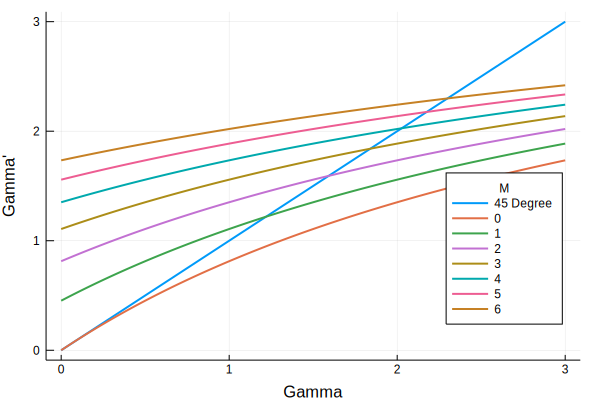

In [4]:
econ = UncertaintyTrapEcon()
@unpack ρ, σ_θ, γ_x = econ # simplify names

# grid for γ and γ_{t+1}
γ = range(1e-10, 3, length = 200)
M_range = 0:6
γp = 1 ./ (ρ^2 ./ (γ .+ γ_x .* M_range') .+ σ_θ^2)

labels = ["0", "1", "2", "3", "4", "5", "6"]

plot(γ, γ, lw = 2, label = "45 Degree")
plot!(γ, γp, lw = 2, label = labels)
plot!(xlabel = "Gamma", ylabel = "Gamma'", legend_title = "M", legend = :bottomright)

The points where the curves hit the 45 degree lines are the long run
steady states corresponding to each $ M $, if that value of
$ M $ was to remain fixed. As the number of firms falls, so does the
long run steady state of precision.

Next let’s generate time series for beliefs and the aggregates – that
is, the number of active firms and average output.

In [5]:
function simulate!(uc, capT = 2_000)

    # allocate memory
    μ_vec = zeros(capT)
    θ_vec = zeros(capT)
    γ_vec = zeros(capT)
    X_vec = zeros(capT)
    M_vec = fill(0, capT)

    # set initial using fields from object
    μ_vec[1] = uc.μ
    γ_vec[1] = uc.γ
    θ_vec[1] = 0

    # draw standard normal shocks
    w_shocks = randn(capT)

    for t in 1:capT-1
        X, M = gen_aggregates(uc)
        X_vec[t] = X
        M_vec[t] = M

        update_beliefs!(uc, X, M)
        update_θ!(uc, w_shocks[t])

        μ_vec[t+1] = uc.μ
        γ_vec[t+1] = uc.γ
        θ_vec[t+1] = uc.θ
    end

    # Record final values of aggregates
    X, M = gen_aggregates(uc)
    X_vec[end] = X
    M_vec[end] = M

    return μ_vec, γ_vec, θ_vec, X_vec, M_vec
end

simulate! (generic function with 2 methods)

First let’s see how well $ \mu $ tracks $ \theta $ in these
simulations

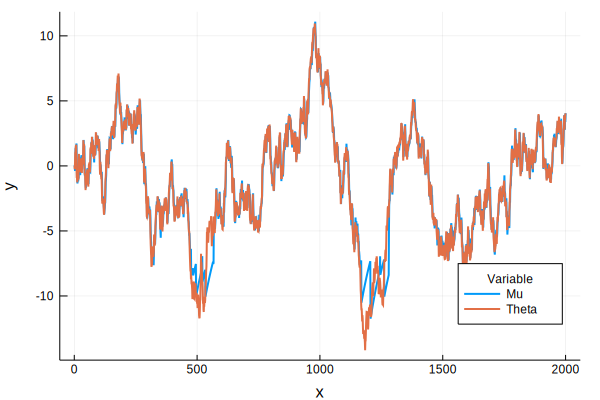

In [6]:
μ_vec, γ_vec, θ_vec, X_vec, M_vec = simulate!(econ)

plot(eachindex(μ_vec), μ_vec, lw = 2, label = "Mu")
plot!(eachindex(θ_vec), θ_vec, lw = 2, label = "Theta")
plot!(xlabel = "x", ylabel = "y", legend_title = "Variable", legend = :bottomright)

Now let’s plot the whole thing together

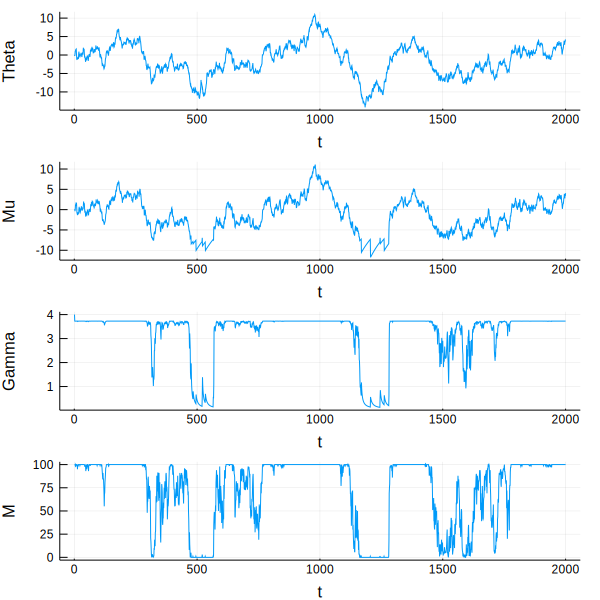

In [7]:
mdf = DataFrame(t = eachindex(θ_vec), θ = θ_vec, μ = μ_vec, γ = γ_vec, M = M_vec)

len = eachindex(θ_vec)
yvals = [θ_vec, μ_vec, γ_vec, M_vec]
vars = ["Theta", "Mu", "Gamma", "M"]

plt = plot(layout = (4,1), size = (600, 600))

for i in 1:4
    plot!(plt[i], len, yvals[i], xlabel = "t", ylabel = vars[i], label = "")
end

plot(plt)